# Computer Vision Nanodegree

## Project: Image Captioning

---

In this notebook, you will use your trained model to generate captions for images in the test dataset.

This notebook **will be graded**.  

Feel free to use the links below to navigate the notebook:
- [Step 1](#step1): Get Data Loader for Test Dataset 
- [Step 2](#step2): Load Trained Models
- [Step 3](#step3): Finish the Sampler
- [Step 4](#step4): Clean up Captions
- [Step 5](#step5): Generate Predictions!

<a id='step1'></a>
## Step 1: Get Data Loader for Test Dataset

Before running the code cell below, define the transform in `transform_test` that you would like to use to pre-process the test images.  

Make sure that the transform that you define here agrees with the transform that you used to pre-process the training images (in **2_Training.ipynb**).  For instance, if you normalized the training images, you should also apply the same normalization procedure to the test images.

In [1]:
import sys
sys.path.append('/opt/cocoapi/PythonAPI')
from pycocotools.coco import COCO
from data_loader import get_loader
from torchvision import transforms

# TODO #1: Define a transform to pre-process the testing images.
transform_test = transforms.Compose([ 
    transforms.Resize(256),                          # smaller edge of image resized to 256
    transforms.RandomCrop(224),                      # get 224x224 crop from random location
    transforms.RandomHorizontalFlip(),               # horizontally flip image with probability=0.5
    transforms.ToTensor(),                           # convert the PIL Image to a tensor
    transforms.Normalize((0.485, 0.456, 0.406),      # normalize image for pre-trained model
                         (0.229, 0.224, 0.225))])

#-#-#-# Do NOT modify the code below this line. #-#-#-#

# Create the data loader.
data_loader = get_loader(transform=transform_test,    
                         mode='test')

Vocabulary successfully loaded from vocab.pkl file!


Run the code cell below to visualize an example test image, before pre-processing is applied.

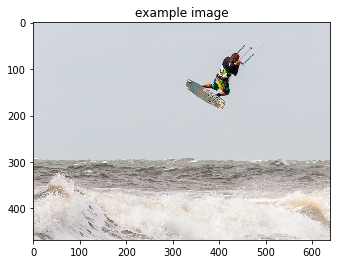

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Obtain sample image before and after pre-processing.
orig_image, image = next(iter(data_loader))

# Visualize sample image, before pre-processing.
plt.imshow(np.squeeze(orig_image))
plt.title('example image')
plt.show()

<a id='step2'></a>
## Step 2: Load Trained Models

In the next code cell we define a `device` that you will use move PyTorch tensors to GPU (if CUDA is available).  Run this code cell before continuing.

In [3]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Before running the code cell below, complete the following tasks.

### Task #1

In the next code cell, you will load the trained encoder and decoder from the previous notebook (**2_Training.ipynb**).  To accomplish this, you must specify the names of the saved encoder and decoder files in the `models/` folder (e.g., these names should be `encoder-5.pkl` and `decoder-5.pkl`, if you trained the model for 5 epochs and saved the weights after each epoch).  

### Task #2

Plug in both the embedding size and the size of the hidden layer of the decoder corresponding to the selected pickle file in `decoder_file`.

In [4]:
# Watch for any changes in model.py, and re-load it automatically.
% load_ext autoreload
% autoreload 2

import os
import torch
from model import EncoderCNN, DecoderRNN

# TODO #2: Specify the saved models to load.
encoder_file = 'encoder-3.pkl' 
decoder_file = 'decoder-3.pkl' 

# TODO #3: Select appropriate values for the Python variables below.
embed_size = 512
hidden_size = 512

# The size of the vocabulary.
vocab_size = len(data_loader.dataset.vocab)

# Initialize the encoder and decoder, and set each to inference mode.
encoder = EncoderCNN(embed_size)
encoder.eval()
decoder = DecoderRNN(embed_size, hidden_size, vocab_size)
decoder.eval()

# Load the trained weights.
encoder.load_state_dict(torch.load(os.path.join('./models', encoder_file)))
decoder.load_state_dict(torch.load(os.path.join('./models', decoder_file)))

# Move models to GPU if CUDA is available.
encoder.to(device)
decoder.to(device)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:12<00:00, 8210903.22it/s] 


DecoderRNN(
  (embed): Embedding(9955, 512)
  (lstm): LSTM(512, 512, batch_first=True)
  (fc): Linear(in_features=512, out_features=9955, bias=True)
)

<a id='step3'></a>
## Step 3: Finish the Sampler

Before executing the next code cell, you must write the `sample` method in the `DecoderRNN` class in **model.py**.  This method should accept as input a PyTorch tensor `features` containing the embedded input features corresponding to a single image.

It should return as output a Python list `output`, indicating the predicted sentence.  `output[i]` is a nonnegative integer that identifies the predicted `i`-th token in the sentence.  The correspondence between integers and tokens can be explored by examining either `data_loader.dataset.vocab.word2idx` (or `data_loader.dataset.vocab.idx2word`).

After implementing the `sample` method, run the code cell below.  If the cell returns an assertion error, then please follow the instructions to modify your code before proceeding.  Do **not** modify the code in the cell below. 

In [33]:
# Move image Pytorch Tensor to GPU if CUDA is available.

image = image.to(device)

# Obtain the embedded image features.
features = encoder(image).unsqueeze(1)

# Pass the embedded image features through the model to get a predicted caption.
output = decoder.sample(features)
print('example output:', output)

assert (type(output)==list), "Output needs to be a Python list" 
assert all([type(x)==int for x in output]), "Output should be a list of integers." 
assert all([x in data_loader.dataset.vocab.idx2word for x in output]), "Each entry in the output needs to correspond to an integer that indicates a token in the vocabulary."

inputs tensor([[[ 3.6915,  1.1218,  0.1711, -0.7522,  0.7288,  0.5615,  0.7704,
          -1.3694, -1.3789, -0.5928,  0.2058, -2.5300, -1.2948, -1.9265,
           0.6330, -0.6117,  0.2256,  0.7255, -0.7743,  0.2073,  0.6891,
          -2.1177,  2.2534, -1.9334, -1.3354,  2.1418,  0.5907,  1.5423,
           0.9685, -0.2990, -0.6415, -0.9437,  0.6209,  2.3981,  0.1625,
          -1.1414, -0.9437, -1.8010,  3.4227, -3.0131,  0.7615, -1.1845,
          -4.3771,  1.4049, -1.2729,  0.5554,  0.3680, -1.9578, -1.7782,
           1.7943,  1.5688,  0.8327, -3.3950,  1.5170,  0.2528, -1.3651,
          -0.1346,  1.8816, -0.9704, -1.7063,  1.5135,  1.2058, -1.3629,
          -0.8949,  2.5547, -0.0958,  1.1458, -2.4665, -0.5321,  0.9951,
           0.1296,  0.1206, -0.1904,  1.2967, -1.1355,  0.2378,  2.3346,
           0.1158, -0.3541,  0.7897,  2.6794, -0.7507, -3.1498, -2.2676,
          -3.7524, -2.4691,  0.4866, -0.5200,  0.0977, -2.3373,  0.5386,
          -2.3685,  1.5469, -2.0640,  0.8257

states (tensor([[[ 0.0222, -0.4014, -0.4922,  0.8392, -0.6248, -0.3642,  0.4322,
           0.8370,  0.9132, -0.8514, -0.8238, -0.8070,  0.8024, -0.9219,
           0.9193, -0.4087,  0.7923, -0.2871,  0.8263, -0.6528, -0.9265,
          -0.4911,  0.9626,  0.7849,  0.8767, -0.9124,  0.1972,  0.0165,
           0.6064,  0.4252, -0.9243,  0.4411,  0.8427,  0.0279,  0.9813,
          -0.9650,  0.9627,  0.4941,  0.8753,  0.1006,  0.6019,  0.9500,
           0.8090,  0.9632,  0.9411, -0.9087,  0.9414,  0.6323, -0.3752,
          -0.7714,  0.4812,  0.9010,  0.9363, -0.8505,  0.8564, -0.0544,
           0.7206, -0.3882,  0.7622, -0.6234,  0.9132, -0.2057, -0.6248,
           0.3059, -0.7220,  0.5445, -0.9127,  0.8902,  0.9704,  0.8450,
           0.9008, -0.9467,  0.9681, -0.8867,  0.8231,  0.6341, -0.9633,
          -0.6649,  0.4536, -0.6348, -0.5392,  0.8922, -0.9287, -0.9656,
          -0.4792,  0.4806, -0.7394,  0.8148, -0.9572, -0.8973,  0.8082,
          -0.4349, -0.9111,  0.8984,  0.881

fc_out tensor([[[-1.2936e+00,  8.2923e+00,  5.4232e+00,  ..., -3.9983e-01,
          -5.7252e-01,  2.8052e-02]]], device='cuda:0')
pred_idx tensor([[ 21]], device='cuda:0')
inputs tensor([[[ 0.1978, -0.0438,  0.8279, -0.2048, -0.6288,  1.7922, -1.1102,
           0.4759,  0.5039,  1.4272,  1.5135,  1.6331,  0.5536,  0.1677,
           0.6161,  1.1646, -0.0746, -0.0125, -0.6791, -1.4627, -0.9253,
          -0.1384, -1.3054, -0.9761, -1.4755,  1.1630, -1.3913,  0.5211,
          -1.0821,  1.2260, -0.7321, -0.3186, -0.0159, -2.3057, -0.3774,
           0.9893,  0.9440,  0.9087,  0.4468, -1.1906,  0.2023, -0.1894,
          -0.7129, -0.3147,  0.8439,  1.5898, -0.7837, -0.3391,  1.4316,
           0.6975,  0.7436, -0.5823,  0.4446, -1.7832,  0.9879,  1.5203,
          -0.9068,  0.0613,  0.7320, -1.2535, -0.3359,  1.2336,  1.1975,
          -0.1536,  0.2278, -1.1814, -0.1581,  1.1402, -1.2486,  0.8939,
          -0.8462, -1.7959,  1.1928, -1.1738,  0.9923, -0.6718, -0.2961,
           0.4182

states (tensor([[[ 0.8272, -0.8604,  0.6110,  0.8002,  0.0699, -0.2589,  0.7379,
          -0.1610,  0.9060, -0.7343, -0.6911, -0.0634,  0.6698,  0.2135,
           0.9790, -0.7953,  0.7845, -0.6387,  0.9708, -0.0304, -0.8994,
          -0.8638,  0.9673, -0.1787,  0.8376, -0.9679, -0.7747,  0.5717,
          -0.4565, -0.8399, -0.8662,  0.5509,  0.7786,  0.0617,  0.9292,
           0.9718,  0.9420,  0.4458,  0.8128,  0.6979, -0.4195,  0.8931,
           0.7453, -0.9579,  0.9395, -0.8474,  0.9588,  0.9409, -0.5739,
          -0.7230,  0.5966,  0.8988,  0.9798, -0.5468,  0.8926,  0.7629,
          -0.7339, -0.6747,  0.8002, -0.1349,  0.8716, -0.7788,  0.7797,
           0.4426,  0.8086,  0.7310, -0.9830,  0.9456,  0.8737,  0.9287,
           0.7905, -0.9596,  0.8774, -0.7523,  0.9329,  0.9668, -0.9393,
          -0.5628, -0.5607, -0.4494, -0.5931,  0.9233,  0.9660, -0.9741,
          -0.6600, -0.8510, -0.9216,  0.8378, -0.9675, -0.9105,  0.9697,
           0.5714, -0.9747,  0.9288,  0.971

inputs tensor([[[-0.6225, -0.2717, -1.1031, -1.3054, -1.0281,  0.4942, -0.4497,
           0.1348,  0.1703, -1.1618, -1.1329,  1.5217, -2.0581,  0.8794,
          -0.6044, -0.1264,  0.6651,  1.0034,  0.2269, -1.3359,  0.8151,
          -0.9845, -0.7648,  1.2971,  0.0849,  1.6881,  0.6681,  0.4719,
           0.2276,  1.3594, -1.4090, -0.4074, -0.9828,  2.0444, -0.1420,
          -0.0998,  1.0728, -0.8608,  0.1379,  0.8595, -1.0178, -1.0852,
           0.8979,  1.1057, -0.3110,  1.4112,  0.6370,  2.7215,  0.2181,
           0.2559,  1.6824,  0.1656, -1.2870,  2.0229,  1.1719,  0.7663,
           0.2695,  0.0953,  1.2768,  0.4643,  1.3690,  1.0836, -0.0968,
          -0.3238,  0.1037,  2.2287,  1.4681, -1.4804,  2.1409,  1.1291,
          -0.7726, -1.4456,  1.0377, -0.1388, -0.9737,  2.0414,  1.2460,
           0.5042, -0.4555, -0.6334,  1.3475, -0.1911, -0.8110, -0.6203,
           1.1728, -0.9606, -0.9111,  0.1421,  1.2671, -0.6919,  0.6391,
          -1.1646, -0.3237,  0.2768, -1.3228

<a id='step4'></a>
## Step 4: Clean up the Captions

In the code cell below, complete the `clean_sentence` function.  It should take a list of integers (corresponding to the variable `output` in **Step 3**) as input and return the corresponding predicted sentence (as a single Python string). 

In [21]:
# TODO #4: Complete the function.
def clean_sentence(output):
    sentence = ''
    for i in output:
        if i != 0 and i != 1:
            sentence = sentence + " " + data_loader.dataset.vocab.idx2word[i]
    return sentence

After completing the `clean_sentence` function above, run the code cell below.  If the cell returns an assertion error, then please follow the instructions to modify your code before proceeding.

In [7]:
sentence = clean_sentence(output)
print('example sentence:', sentence)

assert type(sentence)==str, 'Sentence needs to be a Python string!'

example sentence:  a man is sitting on a table with a table . . .


<a id='step5'></a>
## Step 5: Generate Predictions!

In the code cell below, we have written a function (`get_prediction`) that you can use to use to loop over images in the test dataset and print your model's predicted caption.

In [36]:
def get_prediction():
    orig_image, image = next(iter(data_loader))
    plt.imshow(np.squeeze(orig_image))
    plt.title('Sample Image')
    plt.show()
    image = image.to(device)
    features = encoder(image).unsqueeze(1)
    output = decoder.sample(features)    
    sentence = clean_sentence(output)
    print(sentence)

Run the code cell below (multiple times, if you like!) to test how this function works.

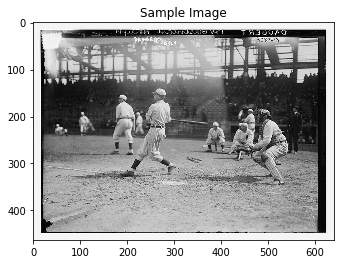

 a man is sitting on a table with a table . . .


In [37]:
get_prediction()

As the last task in this project, you will loop over the images until you find four image-caption pairs of interest:
- Two should include image-caption pairs that show instances when the model performed well.
- Two should highlight image-caption pairs that highlight instances where the model did not perform well.

Use the four code cells below to complete this task.

### The model performed well!

Use the next two code cells to loop over captions.  Save the notebook when you encounter two images with relatively accurate captions.

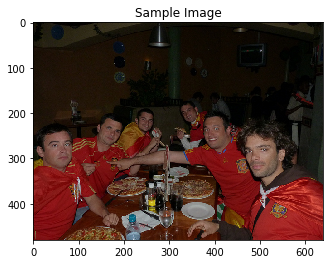

 a man is sitting on a table with a table . . .


In [38]:
get_prediction()

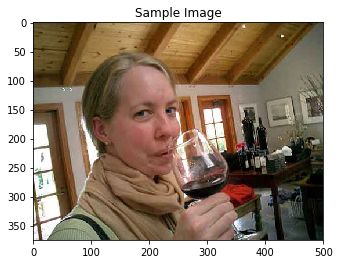

 a man is sitting on a table with a table . . .


In [39]:
get_prediction()

### The model could have performed better ...

Use the next two code cells to loop over captions.  Save the notebook when you encounter two images with relatively inaccurate captions.

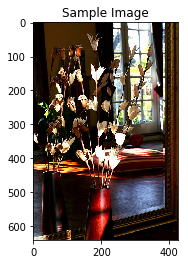

 a man is sitting on a table with a table . . .


In [12]:
get_prediction()

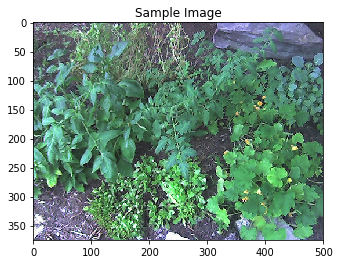

 a man is sitting on a table with a table . . .


In [13]:
get_prediction()